# Homework One
## Shannon Dow 
### Problem 5: 

Consider the Lotka--Volterra system:
  \begin{align*}
    \begin{cases}
      u_1'(t) = \alpha u_1(t) - \beta u_1(t) u_2(t),\\
      u_2'(t) = \delta u_1(t) u_2(t) - \gamma u_2(t).
      \end{cases}
    \end{align*}
    For $\alpha = \delta = \gamma = \beta = 1$ and $u_1(0) = 5, u_2(0) = 0.8$ use the forward Euler method to approximate the solution with $k = 0.001$ for $t = 0,0.001,\ldots,50$.  Plot your approximate solution as a curve in the $(u_1,u_2)$-plane and plot your approximations of $u_1(t)$ and $u_2(t)$ on the same axes as a function of $t$.  Repeat this with backward Euler.  What do you notice about the behavior of the numerical solutions?  The most obvious feature is most apparent in the $(u_1,u_2)$-plane.


In [1]:
#Assign Values to Parameters:
α = 1
δ = 1
γ = 1
β = 1

1

In [2]:
#Define f(u)
f = u -> [α*u[1]-β*u[1]*u[2], δ*u[1]*u[2]-γ*u[2]]

#3 (generic function with 1 method)

In [3]:
#Stepsize
k = 0.001
#Max Time
T = 50

50

## Forward Euler

In [4]:
# Forward Euler
n = convert(Int64,T/k)# Number of time steps, converted to Int64
U = zeros(2,n+1) # To save the solution values
U[:,1] = [5,0.8]
for i = 2:n+1
    U[:,i] = U[:,i-1] + k*f(U[:,i-1])
end

In [5]:
#Print U
U

2×50001 Array{Float64,2}:
 5.0  5.001   5.00198   5.00295   …  0.0967196  0.0968025  0.0968854
 0.8  0.8032  0.806414  0.809641     0.14305    0.142921   0.142792 

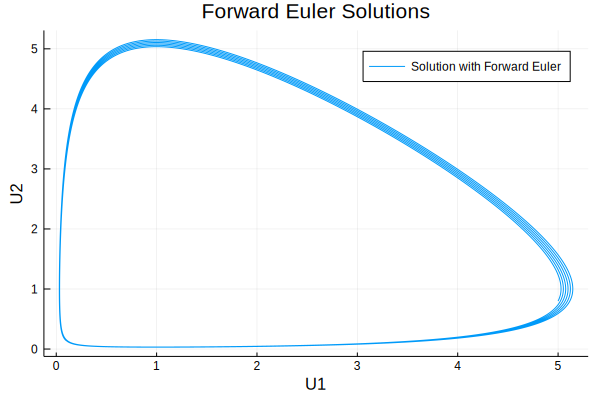

In [6]:
using Plots
plot(U[1,:],U[2,:],label="Solution with Forward Euler",title = "Forward Euler Solutions")
xlabel!("U1")
ylabel!("U2")

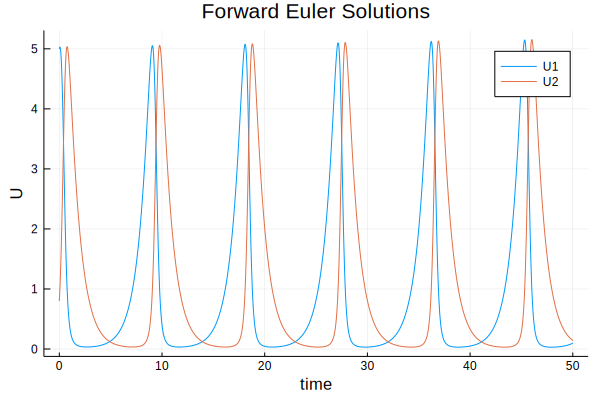

In [7]:
t= range(0,stop = T,step = k)
plot(t,U[1,:],label ="U1",title = "Forward Euler Solutions")
plot!(t,U[2,:], label = "U2")
xlabel!("time")
ylabel!("U")

## Backward Euler

In [8]:
g = (U,Un) -> U - Un - k*f(U)
Dg = (U) -> [1-k*α+k*β*U[2] k*β*U[1]; 
    -k*δ*U[2] 1-k*δ*U[1]+k*γ]

#7 (generic function with 1 method)

In [9]:
# Backward Euler
n = convert(Int64,T/k) # Number of time steps, converted to Int64
Ub = zeros(2,n+1) # To save the solution values
Ub[:,1] = [5,0.8]
max_iter = 10
for i = 2:n+1
    Unew = Ub[:,i-1]
    Uold = Ub[:,i-1]
    for j = 1:max_iter
        Uold = Unew
        Unew = Uold - (Dg(Uold)\g(Uold,Ub[:,i-1]))
        #println(maximum(abs.(Unew-Uold)))
        if maximum(abs.(Unew-Uold)) < k/10 # Newton's method until error tol.
            break
        end
        if j == max_iter
            println("Newton didn't terminate")
        end
    end
    Ub[:,i] = Unew
end

In [10]:
Ub

2×50001 Array{Float64,2}:
 5.0  5.00098   5.00195   5.0029    …  0.200303   0.200485   0.200668
 0.8  0.803214  0.806441  0.809682     0.0894329  0.0893614  0.08929 

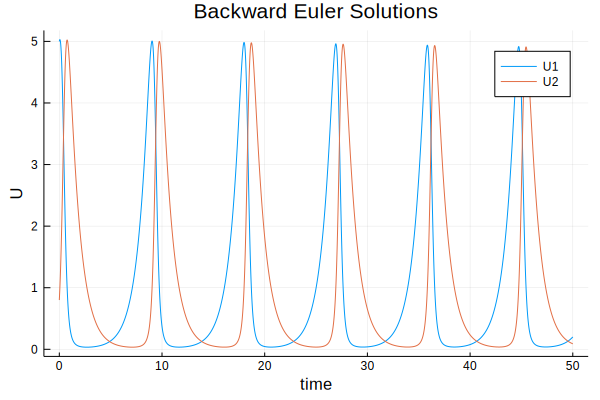

In [11]:
t= range(0,stop = T,step = k)
plot(t,Ub[1,:],label ="U1",title = "Backward Euler Solutions")
plot!(t,Ub[2,:], label = "U2")
xlabel!("time")
ylabel!("U")

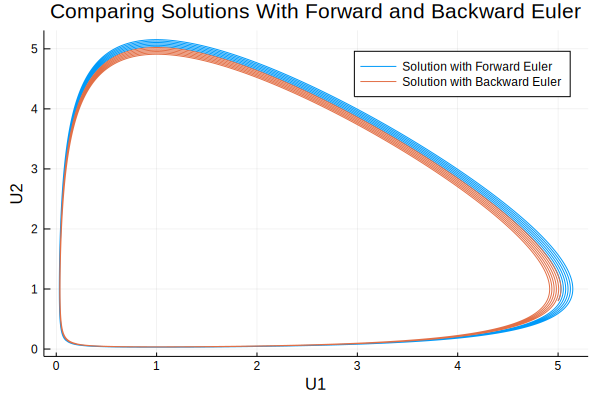

In [14]:
plot(U[1,:],U[2,:],label="Solution with Forward Euler",title="Comparing Solutions With Forward and Backward Euler")
plot!(Ub[1,:],Ub[2,:],label="Solution with Backward Euler")
xlabel!("U1")
ylabel!("U2")

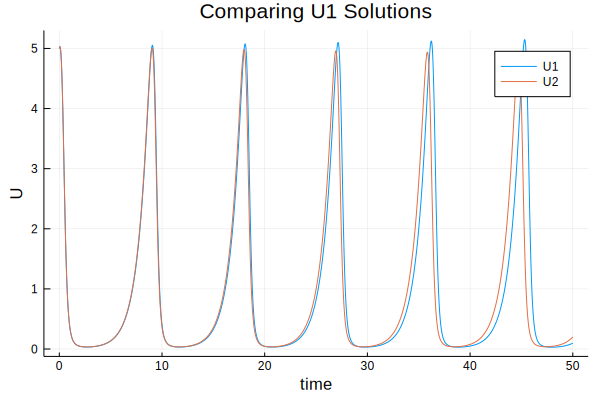

In [13]:
t= range(0,stop = T,step = k)
plot(t,U[1,:],label ="U1",title = "Comparing U1 Solutions")
plot!(t,Ub[1,:], label = "U2")
xlabel!("time")
ylabel!("U")

As shown in the graph above, the solution with Forward Euler grows faster over time so it has a larger amplitude and period, whereas the Backward Euler solution decays over time. This can also be seen in the U1-U2 plane where the Forward Euler solution goes further than the Backward Euler solution. 